# Task 2

---

## Predictive modeling of customer bookings

This Jupyter notebook includes some code to get you started with this predictive modeling task. We will use various packages for data manipulation, feature engineering and machine learning.

### Exploratory data analysis

First, we must explore the data in order to better understand what we have and the statistical properties of the dataset.

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("data/customer_booking.csv", encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


The `.head()` method allows us to view the first 5 rows in the dataset, this is useful for visual inspection of our columns

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

The `.info()` method gives us a data description, telling us the names of the columns, their data types and how many null values we have. Fortunately, we have no null values. It looks like some of these columns should be converted into different data types, e.g. flight_day.

To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

Before we compute any statistics on the data, lets do any necessary data conversion

In [4]:
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [5]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

In [6]:
df["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5])

In [7]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,3.814420,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,1.992792,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


The `.describe()` method gives us a summary of descriptive statistics over the entire dataset (only works for numeric columns). This gives us a quick overview of a few things such as the mean, min, max and overall distribution of each column.

From this point, you should continue exploring the dataset with some visualisations and other metrics that you think may be useful. Then, you should prepare your dataset for predictive modelling. Finally, you should train your machine learning model, evaluate it with performance metrics and output visualisations for the contributing variables. All of this analysis should be summarised in your single slide.

In [8]:
from sklearn.ensemble import RandomForestClassifier  # Example model
from sklearn.datasets import load_iris  # Example dataset
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import OrdinalEncoder
# seperate X and y
X = df.drop("booking_complete", axis=1)
y = df["booking_complete"]

categorical_cols = [x for x in df.columns if df[x].dtype=="object"]
categorical_cols
encoder = OrdinalEncoder()

X[categorical_cols] = encoder.fit_transform(X[categorical_cols])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
y_train_series = pd.Series(y_train)
percent_classes = (y_train_series.value_counts()[1] /( y_train_series.value_counts()[0] + y_train_series.value_counts()[1])) * 100
print(f"Percentage of class 1 {percent_classes:.2f}%")


Percentage of class 1 14.99%


In [10]:
model1 = RandomForestClassifier(random_state=42)
model1.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [11]:
from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report
y_pred = model1.predict(X_test)
print("AUC-ROC:", roc_auc_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


AUC-ROC: 0.5450593198832635
              precision    recall  f1-score   support

           0       0.86      0.98      0.92      8520
           1       0.54      0.11      0.18      1480

    accuracy                           0.85     10000
   macro avg       0.70      0.55      0.55     10000
weighted avg       0.82      0.85      0.81     10000



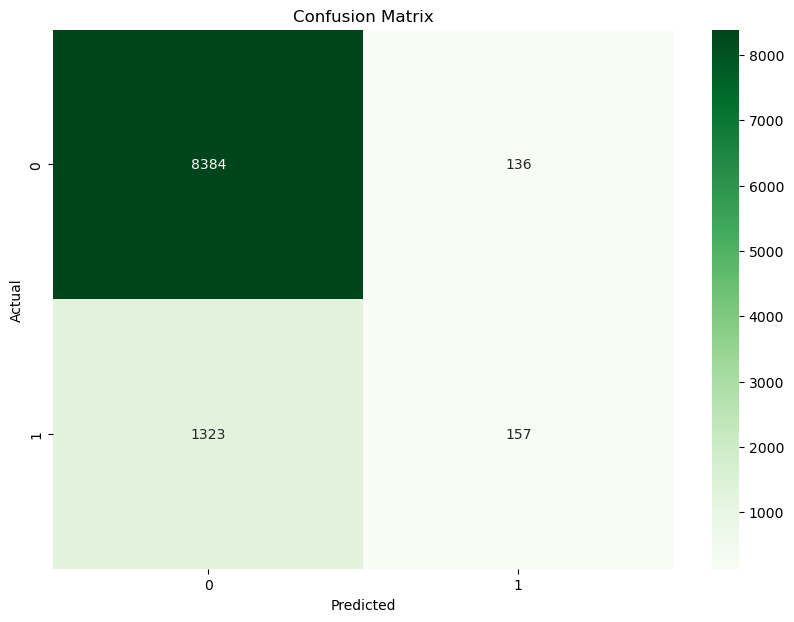

In [12]:
# Visualize the confusion matrix 
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

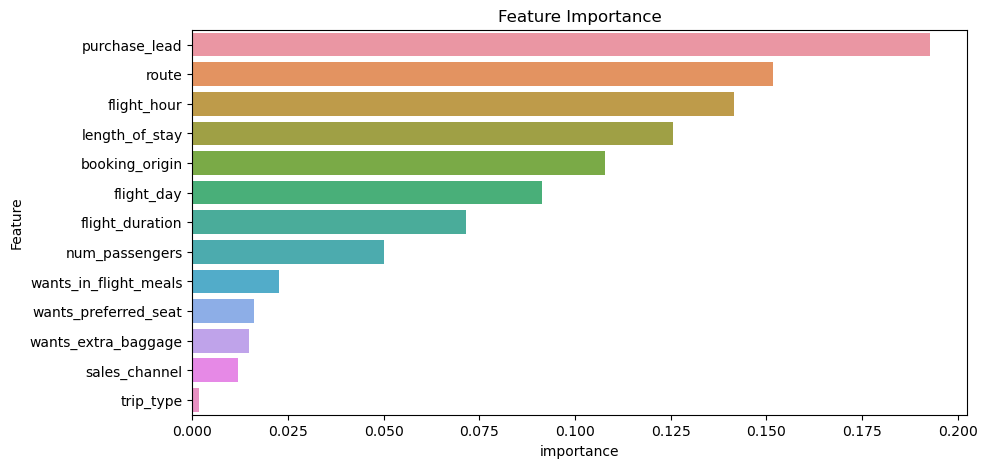

In [13]:
importances = model1.feature_importances_
features = X_train.columns
# sort values by importance
features_importance = pd.DataFrame(importances, index=features, columns=["importance"]).sort_values(by="importance", ascending=False)
plt.figure(figsize=(10, 5))
sns.barplot(x=features_importance["importance"], y=features_importance.index)
plt.title("Feature Importance")
plt.ylabel("Feature")
plt.show()

The class imbalance in the target variable makes it difficult to distinguish between classes 0 and 1 in the 'booking confirmed' prediction, resulting in a low AUC score. Undersampling may help improve the model's performance.

# Random Forest with Undersampling

In [14]:
# Bagging With Random Undersampling
model2 = RandomForestClassifier(random_state=42, class_weight="balanced")
model2.fit(X_train, y_train)
y_pred_cw = model2.predict(X_test)
print("AUC-ROC:", roc_auc_score(y_test, y_pred_cw))
print(classification_report(y_test, y_pred_cw))



AUC-ROC: 0.543103667047329
              precision    recall  f1-score   support

           0       0.86      0.99      0.92      8520
           1       0.58      0.10      0.17      1480

    accuracy                           0.86     10000
   macro avg       0.72      0.54      0.54     10000
weighted avg       0.82      0.86      0.81     10000



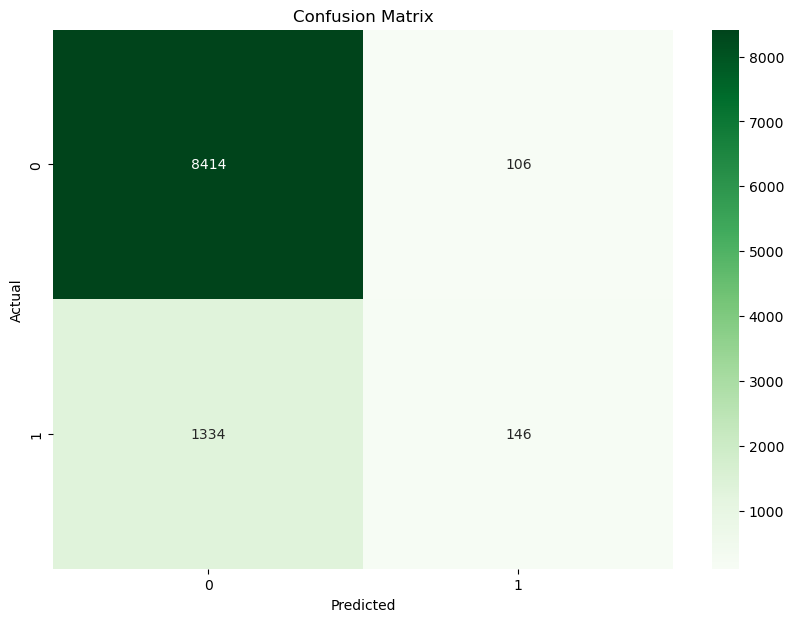

In [15]:
cm = confusion_matrix(y_test, y_pred_cw)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

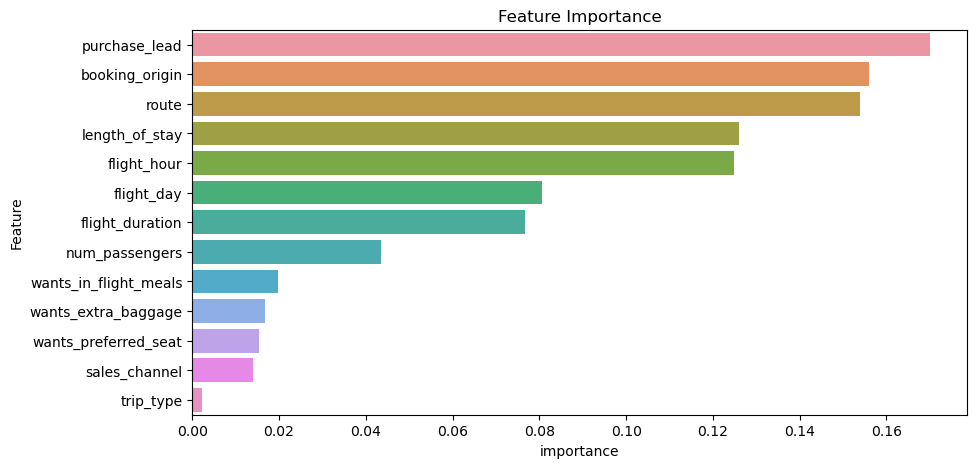

In [16]:
importances_cw = model2.feature_importances_
features_cw = X_train.columns
# sort values by importance
features_importance_cw = pd.DataFrame(importances_cw, index=features_cw, columns=["importance"]).sort_values(by="importance", ascending=False)
plt.figure(figsize=(10, 5))
sns.barplot(x=features_importance_cw["importance"], y=features_importance_cw.index)
plt.title("Feature Importance")
plt.ylabel("Feature")
plt.show()

Undersampling did not improve the model's performance. However, using synthetic bagging techniques like SMOTE (Synthetic Minority Over-sampling Technique) may help enhance the model's performance.

# Random Forest with SMOTE 

In [17]:
from imblearn.over_sampling import SMOTE

smote=SMOTE(sampling_strategy='minority') 
X_train_s,y_train_s=smote.fit_resample(X_train,y_train )
y_train_s.value_counts()

0    34002
1    34002
Name: booking_complete, dtype: int64

In [18]:
model3 = RandomForestClassifier(random_state=42)
model3.fit(X_train_s,y_train_s)

RandomForestClassifier(random_state=42)

In [19]:
y_pred_smote = model3.predict(X_test)
print("AUC-ROC:", roc_auc_score(y_test, y_pred_smote))
print(classification_report(y_test, y_pred_smote))

AUC-ROC: 0.6250015860931354
              precision    recall  f1-score   support

           0       0.89      0.90      0.89      8520
           1       0.37      0.35      0.36      1480

    accuracy                           0.82     10000
   macro avg       0.63      0.63      0.63     10000
weighted avg       0.81      0.82      0.81     10000



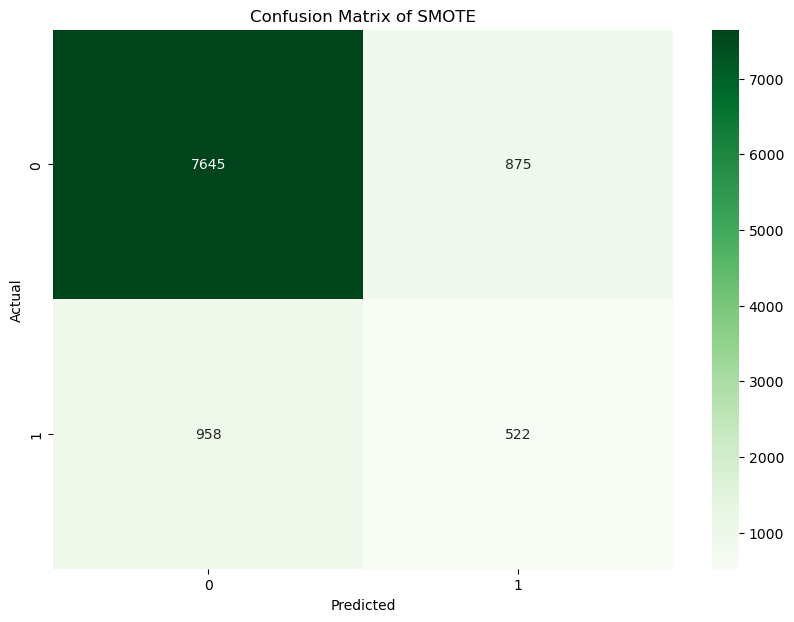

In [26]:
plt.figure(figsize=(10, 7))
cm = confusion_matrix(y_test, y_pred_smote)
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix of SMOTE")
plt.show()


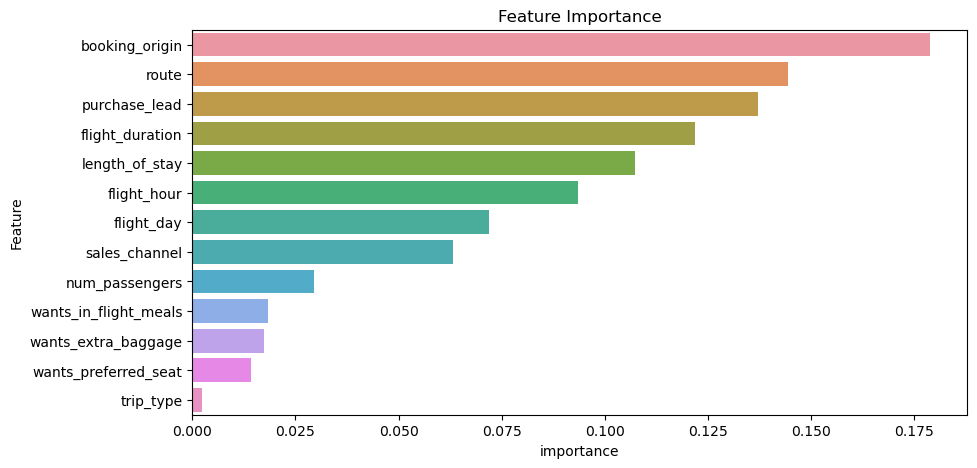

In [20]:
importances_smote = model3.feature_importances_
features_smote = X_train.columns
# sort values by importance
features_importance_smote = pd.DataFrame(importances_smote, index=features_smote, columns=["importance"]).sort_values(by="importance", ascending=False)
plt.figure(figsize=(10, 5))
sns.barplot(x=features_importance_smote["importance"], y=features_importance_smote.index)
plt.title("Feature Importance")
plt.ylabel("Feature")
plt.show()

With SMOTE, the model demonstrates proficiency in identifying the majority class (class 0), but it faces challenges in effectively discriminating between the positive (class 1) and negative (class 0) classes. Change in model to XGB classifier and validation test may improve further. 

# XGB Classifier with Validation and Hypertuning

In [34]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

param_grid = {'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'colsample_bytree': [0.7, 0.8, 1.0],
    'subsample': [0.7, 0.8, 1.0], 'gamma': [0, 1, 5]}
# Create a based model
xgb = XGBClassifier(random_state=42)
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = xgb, param_grid = param_grid, 
                          cv = 5, scoring='roc_auc', verbose = 2)
grid_search.fit(X_train_s, y_train_s)
best_xgb_model = grid_search.best_estimator_

Fitting 5 folds for each of 729 candidates, totalling 3645 fits
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.7; total time=   0.2s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.7; total time=   0.2s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.7; total time=   0.2s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.01, max_dept

In [35]:
print("Best parameters found: ", grid_search.best_params_)
y_pred_xgb = best_xgb_model.predict(X_test)
print("AUC-ROC:", roc_auc_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))

Best parameters found:  {'colsample_bytree': 1.0, 'gamma': 0, 'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.7}
AUC-ROC: 0.6356839233599798
              precision    recall  f1-score   support

           0       0.89      0.87      0.88      8520
           1       0.34      0.41      0.37      1480

    accuracy                           0.80     10000
   macro avg       0.62      0.64      0.63     10000
weighted avg       0.81      0.80      0.80     10000



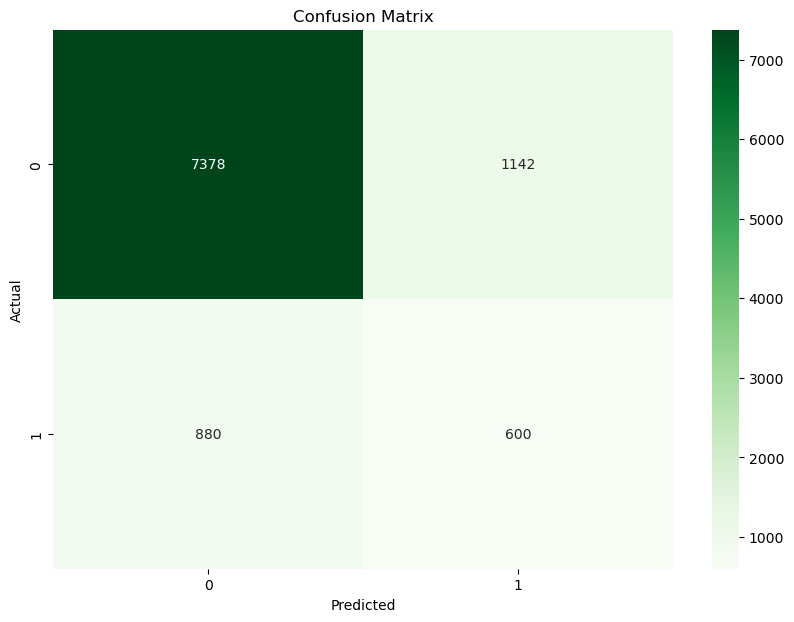

In [36]:
plt.figure(figsize=(10, 7))
cm = confusion_matrix(y_test, y_pred_xgb)
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [37]:
importances_xgb = best_xgb_model.feature_importances_
features_xgb = X_train.columns

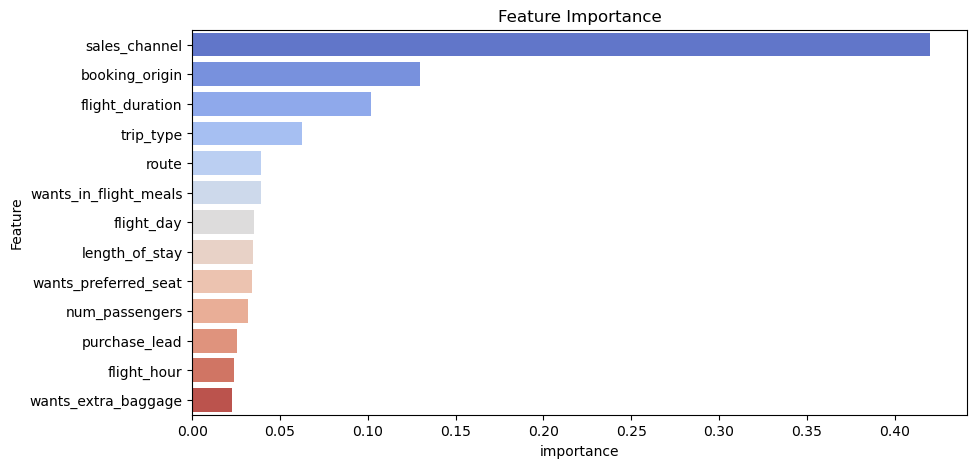

In [52]:
features_importance_xgb = pd.DataFrame(importances_xgb, index=features_xgb, columns=["importance"]).sort_values(by="importance", ascending=False)
plt.figure(figsize=(10, 5))
sns.barplot(x=features_importance_xgb["importance"], y=features_importance_xgb.index, palette="coolwarm")
plt.title("Feature Importance")
plt.ylabel("Feature")
plt.show()

Based on both accuracy and AUC-ROC score, Model 4 performs the best overall among the three models you've shared. It has the highest AUC-ROC score and a reasonably good accuracy compared to the other models.

Given the significant class imbalance in the dataset, each model faced notable difficulties in accurately predicting instances belonging to the positive class. This imbalance skewed predictions towards the majority class, affecting the models' ability to correctly identify instances where the outcome was positive. This observation was consistent across all models evaluated, highlighting the ongoing challenge posed by class imbalance in predictive modeling tasks. This model can be improved by further addressing class imbalance, adding more customer-centric features into the model.